In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
#reading the csv file after uploading it
df = pd.read_csv("netflix_titles.csv")

In [2]:
#data description, different columns which are present
print(df.columns)
print("----------------------")
print(df['description'].head())

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
----------------------
0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object


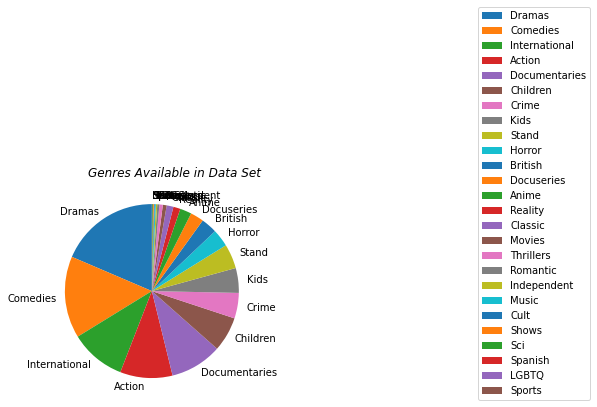

In [3]:
#Distribution of Genres
df['Genres'] = df['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)
tdf = df['Genres'].value_counts().reset_index()
sizes=np.array(tdf['Genres'])
labels=tdf['index']
plt.pie(sizes, labels= labels, startangle = 90)
plt.legend(loc=(2,0))
plt.title(label= 'Genres Available in Data Set', loc="right",fontstyle= 'italic')
plt.show()

In [5]:
#function to clean the given data set 
def clean(w):
  return str.upper(w.replace(" ",""))
#selecting and combining required features for recommender system
f = [ 'Genres', 'type', 'title', 'director', 'cast'] 
feature = df[f] 
for a in feature: #filling null values
  df[a] = df[a].fillna('***')
def comb(columns):
      return columns ["Genres"]+ " " +columns["type"]+ " " +columns["title"]+ " " +columns["director"]+ " " +columns["cast"]
df ["combined_features"] = df.apply(comb, axis =1)
print("combined_features:", df["combined_features"])
for a in feature:
   feature[a] = feature[a].apply(clean)
print("----------------------")
feature.head()

combined_features: 0       International TV Show 3% *** João Miguel, Bian...
1       Dramas Movie 7:19 Jorge Michel Grau Demián Bic...
2       Horror Movie 23:59 Gilbert Chan Tedd Chan, Ste...
3       Action Movie 9 Shane Acker Elijah Wood, John C...
4       Dramas Movie 21 Robert Luketic Jim Sturgess, K...
                              ...                        
7782    Dramas Movie Zozo Josef Fares Imad Creidi, Ant...
7783    Dramas Movie Zubaan Mozez Singh Vicky Kaushal,...
7784    Documentaries Movie Zulu Man in Japan *** Nasty C
7785    International TV Show Zumbo's Just Desserts **...
7786    Documentaries Movie ZZ TOP: THAT LITTLE OL' BA...
Name: combined_features, Length: 7787, dtype: object
----------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Genres,type,title,director,cast
0,INTERNATIONAL,TVSHOW,3%,***,"JOÃOMIGUEL,BIANCACOMPARATO,MICHELGOMES,RODOLFO..."
1,DRAMAS,MOVIE,7:19,JORGEMICHELGRAU,"DEMIÁNBICHIR,HÉCTORBONILLA,OSCARSERRANO,AZALIA..."
2,HORROR,MOVIE,23:59,GILBERTCHAN,"TEDDCHAN,STELLACHUNG,HENLEYHII,LAWRENCEKOH,TOM..."
3,ACTION,MOVIE,9,SHANEACKER,"ELIJAHWOOD,JOHNC.REILLY,JENNIFERCONNELLY,CHRIS..."
4,DRAMAS,MOVIE,21,ROBERTLUKETIC,"JIMSTURGESS,KEVINSPACEY,KATEBOSWORTH,AARONYOO,..."


In [6]:
#creating the count matrix and implementing the cosine similarity matrix based on count matix
cv = CountVectorizer(stop_words='english')
count_matrix = cv.fit_transform(df["combined_features"])
c_sim = cosine_similarity(count_matrix)
c_sim2 = cosine_similarity(count_matrix, count_matrix)
feature = feature.reset_index()
index = pd.Series(feature.index, index = feature['title'])

In [7]:
#defining the recommend function and sorting the movie based on similarity matrix
def recommend(title, c_sim):
  title = title.replace(' ','').upper()
  movie_index = index[title]
  sim_movies = list(enumerate(c_sim[movie_index]))
  sim_movies = sorted(sim_movies, key = lambda x:x[1], reverse = True)
  sim_movies = sim_movies[1:20] #recommend the top 20 similar movies
  m_index = [i[0] for i in sim_movies]
  return df['title'].iloc[m_index]

In [8]:
#eg with a show and movie from the dataset
print('Example with Tv-Show: Dark')
print(recommend('Dark',c_sim2))
print('Example with Movie: 3 Idiots')
print(recommend('3 Idiots',c_sim2))

Example with Tv-Show: Dark
213                                      A Perfect Crime
1208                                             Captive
1828                                                Dope
2061                                           Exhibit A
6524                                         The Keepers
6900                                       The Staircase
7218                                             Trial 4
1619                                        Dark Tourist
1773                                         Dirty Money
1815    Don't F**k with Cats: Hunting an Internet Killer
1881                                          Drug Lords
2057                           Examination of Conscience
2612                                          Happy Jail
3354                            Khan: No. 1 Crime Hunter
3388                                      Killer Ratings
3877                                   Making a Murderer
4288                                     Murder Mountain
4292

In [10]:
#taking input from user and calling the recommend function
n = input("Input the name of the movie or show: ")
recommend( n,c_sim2)

Input the name of the movie or show: friends


3899                     Man with a Plan
2015                            Episodes
321                               Africa
1743                           Diagnosis
4696                          Our Planet
6473                            The Hunt
3412                       Kiss Me First
1412                     Classic Legends
3628                    Life on Location
3632                          Life Story
988                        Blood of Zeus
1597    Danger Mouse: Classic Collection
5215                       Ripper Street
1048                          Borderline
1000                      Blue Planet II
1455             Cold Case Files Classic
4811                 Pee-wee's Playhouse
4875                     Planet Earth II
6636         The Making of Frozen Planet
Name: title, dtype: object